In [1]:
import metrics_helpers as indicators
import pickle as pk
import gc
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:

#open the facebook data
with open('fb_merged_cleaned_flat.pkl', 'rb') as f:
    fb_search = pk.load(f)

#facebook


indicators.add_term_counts(fb_search, fb=True)
indicators.add_url_term_counts(fb_search, fb=True)
indicators.add_total_likes(fb_search, fb=True)
indicators.add_available_comments(fb_search, fb=True)
indicators.add_comment_activity(fb_search, fb=True)
indicators.add_num_unique_posters(fb_search, fb=True)
indicators.add_num_urls(fb_search, fb=True)
indicators.add_avg_comment_length(fb_search)
indicators.add_avg_post_length(fb_search, fb=True)
indicators.add_post_time(fb_search, fb=True)
indicators.add_post_language(fb_search, fb=True)

/usr/local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [3]:
#netmums


with open('/Users/sma/Documents/INRAE internship/scrape-git/netmums/allposts_rerun.pkl', 'rb') as f:
    netmums = pk.load(f)

#this one takes long, around 20 seconds I think.

indicators.add_term_counts(netmums, fb=False)
indicators.add_url_term_counts(netmums, fb=False)
indicators.add_total_likes(netmums, fb=False)
indicators.add_available_comments(netmums, fb=False)
indicators.add_comment_activity(netmums, fb=False)
indicators.add_num_unique_posters(netmums, fb=False)
indicators.add_num_urls(netmums, fb=False)
indicators.add_avg_post_length(netmums, fb=False)
indicators.add_post_time(netmums, fb=False)

In [4]:
import pandas as pd

In [5]:
nmdf = pd.DataFrame.from_dict(netmums).transpose()
nmdf = nmdf.drop(columns=['posts', 'term_counts', 'url_term_counts', 'query'])

In [6]:
terms = list([n for n in netmums.values()][0]['term_counts'].keys())

for term_key in terms:
    d = {url_key: value['term_counts'][term_key] for url_key, value in netmums.items()}
    nmdf['term_counts_' + term_key] = nmdf.index.map(d)
    
for term_key in terms:
    d = {url_key: value['url_term_counts'][term_key] for url_key, value in netmums.items()}
    nmdf['url_term_counts_'+ term_key] = nmdf.index.map(d)

In [7]:
nmdf = nmdf.reset_index()
nmdf = nmdf.rename(columns={"index":"url"})
nmdf

,url,title,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,term_counts_a,...,url_term_counts_toxic,url_term_counts_toxin,url_term_counts_veg,url_term_counts_vegetable,url_term_counts_veggie,url_term_counts_vet,url_term_counts_veterinary,url_term_counts_virus,url_term_counts_vomitoxin,url_term_counts_yoghurt
0,https://www.netmums.com/coffeehouse/drop-clini...,Aptamil Hungry Baby making LO sick??,0,20,20,2,4,929.1,2011-10-30 08:56:00,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.netmums.com/coffeehouse/becoming-m...,Mam bottles,0,17,17,5,0,200.353,2016-01-20 12:41:00,0,...,0,0,0,0,0,0,0,0,0,0
2,https://www.netmums.com/coffeehouse/other-chat...,DEAD INSECT IN SAINSBURYS FOOD!,0,30,30,9,0,213.8,2012-02-19 19:55:00,0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.netmums.com/coffeehouse/home-garde...,buying a house near a factory is it a bad idea?,0,5,5,3,1,534,2017-09-04 21:13:00,0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.netmums.com/coffeehouse/home-garde...,URGENT ADVISE NEEDED PLEASE - oven cleaner fumes,0,5,5,1,0,228.8,2007-11-18 22:51:00,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,https://www.netmums.com/coffeehouse/becoming-m...,Thrush treatment in late pregnancy,0,14,14,2,0,337.071,2011-05-02 19:12:00,0,...,0,0,0,0,0,0,0,0,0,0
6519,https://www.netmums.com/coffeehouse/becoming-m...,Does anyone know .............,0,12,12,2,0,260.583,2014-07-29 22:25:00,0,...,0,0,0,0,0,0,0,0,0,0
6520,https://www.netmums.com/coffeehouse/being-mum-...,kids shopping trolleys,0,7,7,1,0,327,2012-04-13 18:47:00,0,...,0,0,0,0,0,0,0,0,0,0
6521,https://www.netmums.com/coffeehouse/other-chat...,Halloween food ideas,0,12,12,9,6,483.083,2016-10-31 20:20:00,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# drop the dicts and clear memory
del netmums
gc.collect()

20

In [28]:
#add totals
term_count_df = nmdf[nmdf.columns[pd.Series(nmdf.columns).str.startswith('term_counts_')]]

products = term_count_df.columns[[5,12,13,17,33, 34, 35, 44,45,57, 58, 65,66,68, 69,70,78, 79,80, 85]]
hazards = term_count_df.columns[[1,2,3,4,6,7,8,9,10,11,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,36,37,38,39,40,41,42,43,46,47,48,49,50,51,52,53,54,55,56,59,60,61,62,63,64,67,71,72,73,74,75,76,77,81,82,83,84]]


term_count_hazard_df = term_count_df[hazards]
term_count_product_df = term_count_df[products]

url_term_count_df = nmdf[nmdf.columns[pd.Series(nmdf.columns).str.startswith('url_term_counts_')]]

url_term_count_hazard_df = url_term_count_df['url_' + hazards]
url_term_count_product_df = url_term_count_df['url_' + products] 


nmdf['total_term_count'] = term_count_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
nmdf['total_url_term_count'] = term_count_df.sum(axis=1)

nmdf['total_term_count_hazard'] = term_count_hazard_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
nmdf['total_url_term_count_hazard'] = url_term_count_hazard_df.sum(axis=1)

nmdf['total_term_count_product'] = term_count_product_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
nmdf['total_url_term_count_product'] = url_term_count_product_df.sum(axis=1)

## Examine the Pandas Dataframes.

In [29]:
#we want to plot these
nmdf[nmdf.columns[pd.Series(nmdf.columns).str.contains('term_counts_') == 0]].drop(['url','title'],axis=1)

,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,total_term_count,total_url_term_count,total_term_count_hazard,total_term_count_product,total_url_term_count_hazard,total_url_term_count_product
0,0,20,20,2,4,929.1,2011-10-30 08:56:00,68,68,38,30,0,0
1,0,17,17,5,0,200.353,2016-01-20 12:41:00,4,4,2,2,0,0
2,0,30,30,9,0,213.8,2012-02-19 19:55:00,28,28,15,13,0,0
3,0,5,5,3,1,534,2017-09-04 21:13:00,4,4,4,0,0,0
4,0,5,5,1,0,228.8,2007-11-18 22:51:00,2,2,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,0,14,14,2,0,337.071,2011-05-02 19:12:00,4,4,2,2,0,0
6519,0,12,12,2,0,260.583,2014-07-29 22:25:00,4,4,3,1,0,0
6520,0,7,7,1,0,327,2012-04-13 18:47:00,2,2,1,1,0,0
6521,0,12,12,9,6,483.083,2016-10-31 20:20:00,8,8,1,7,0,0


In [30]:
gc.collect()

84

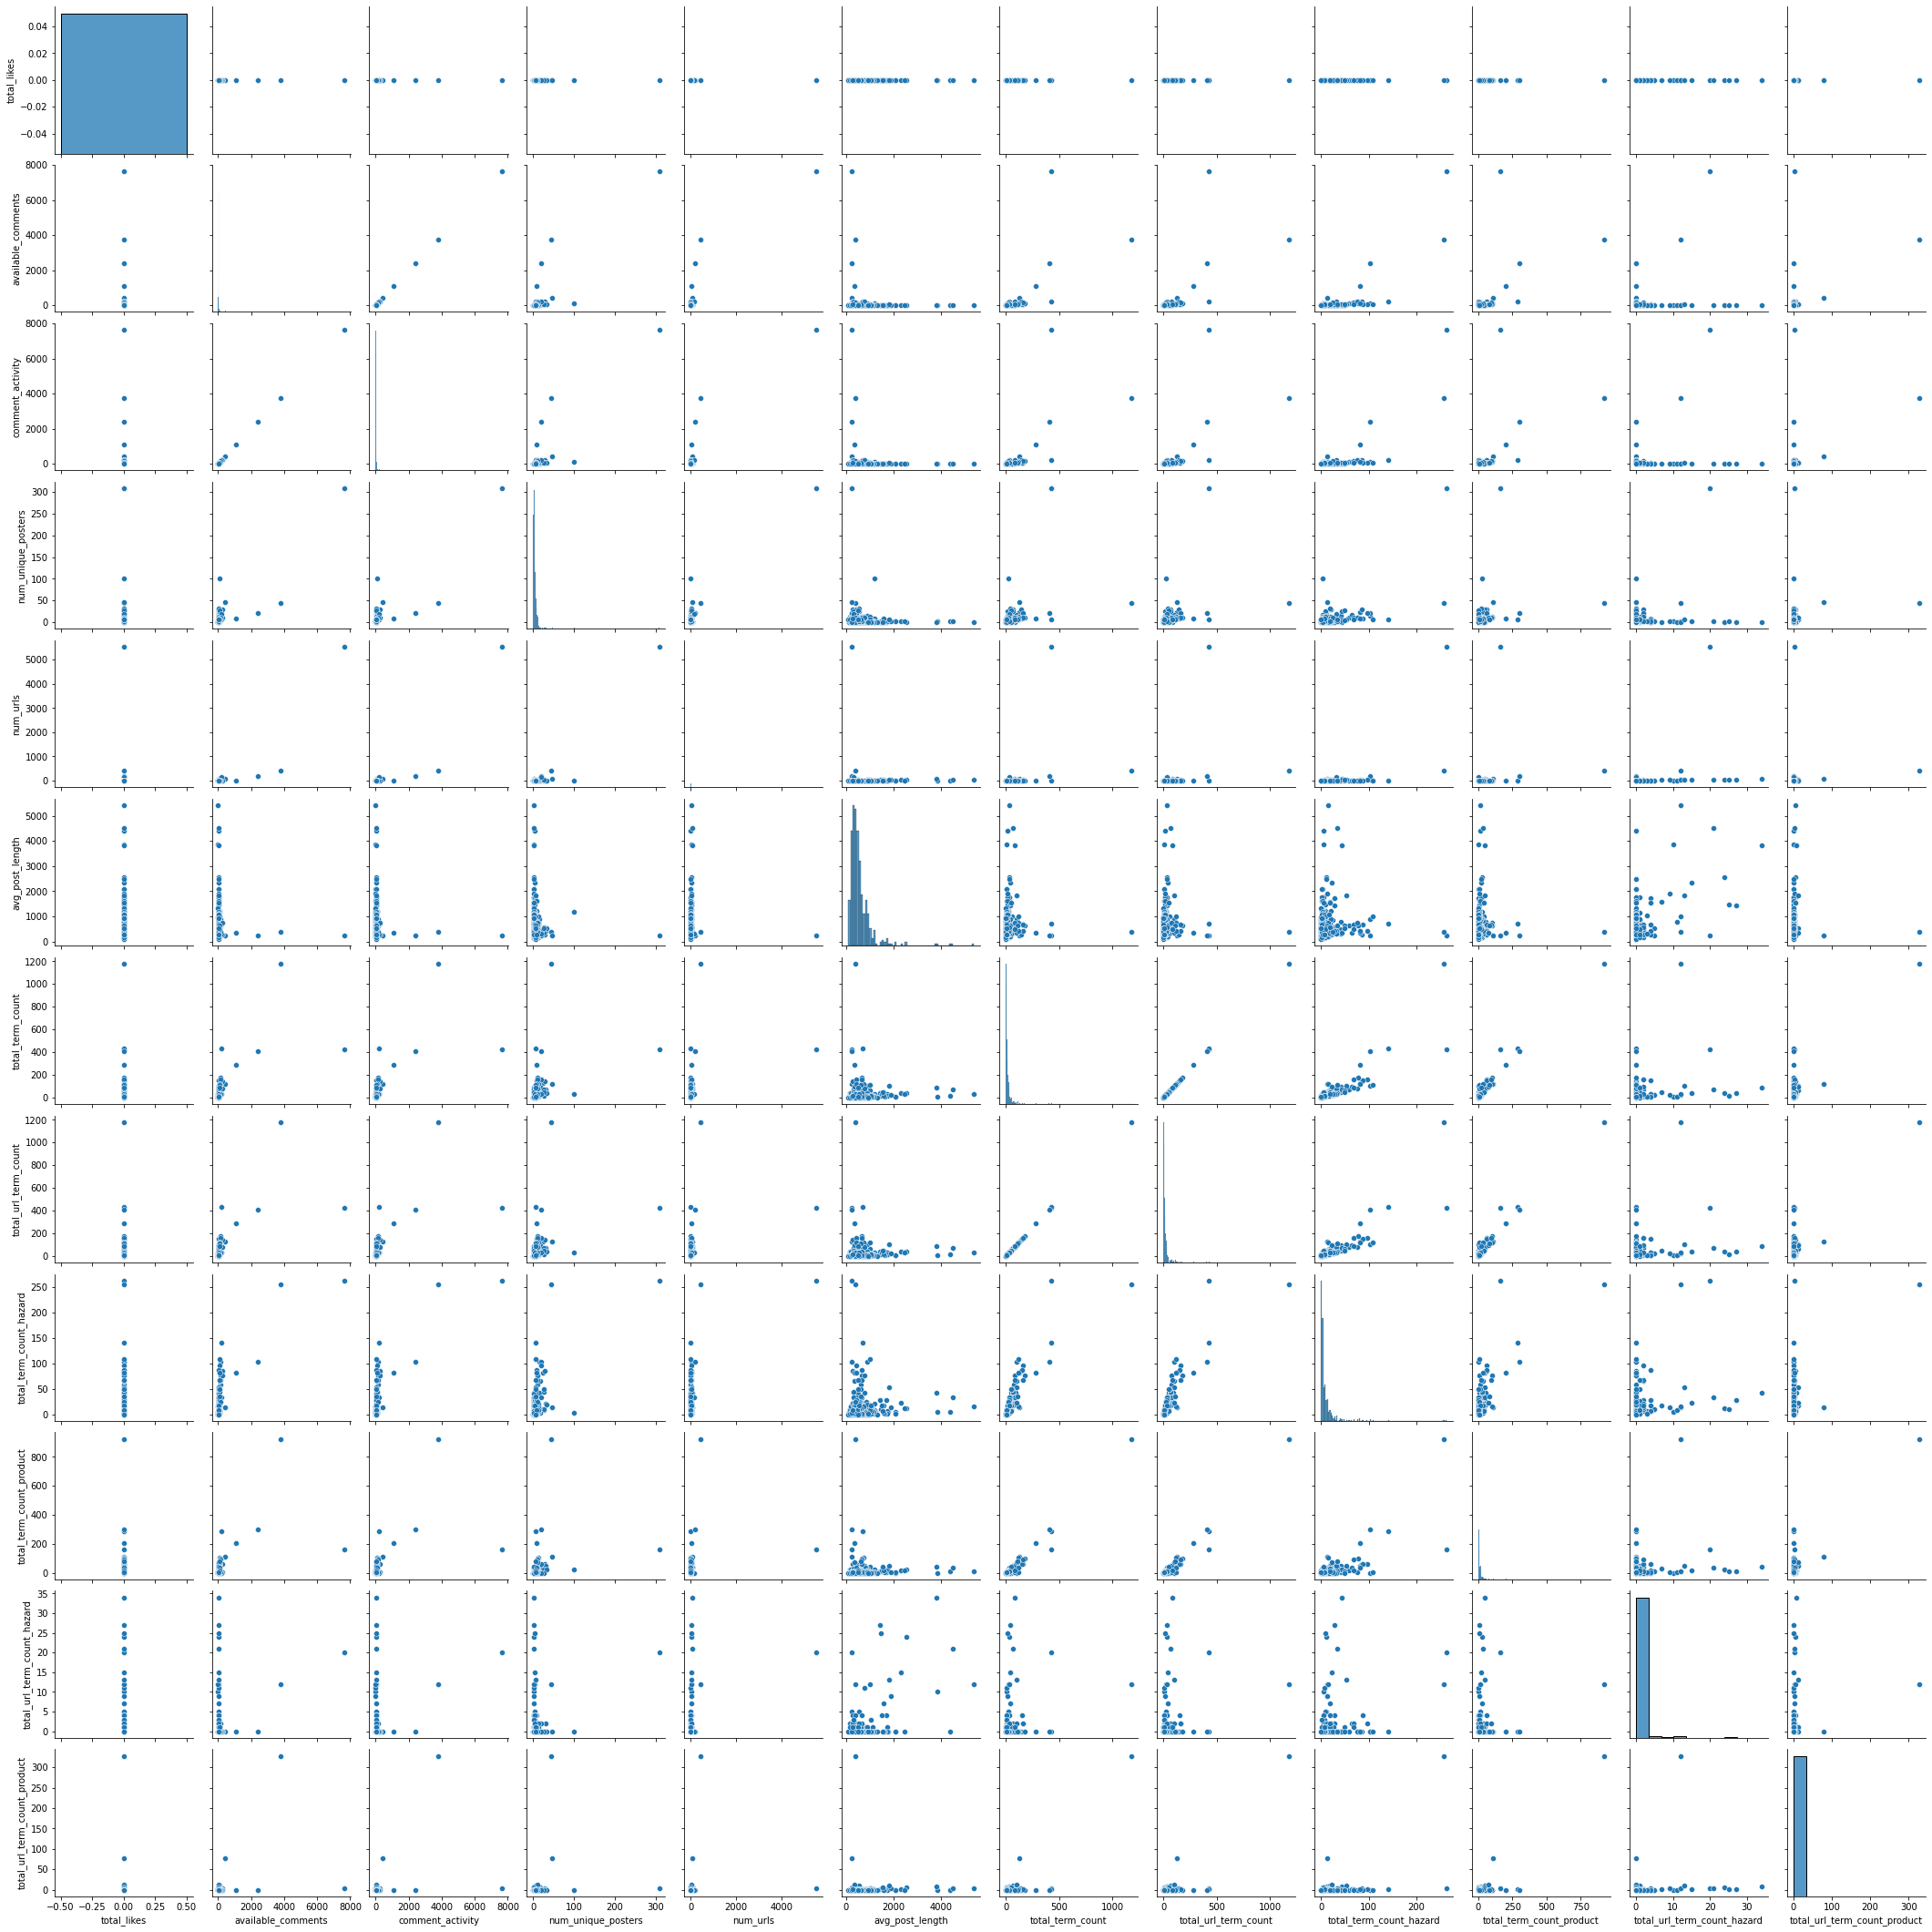

In [32]:
sample = nmdf[nmdf.columns[pd.Series(nmdf.columns).str.contains('term_counts_') == 0]].drop(['url','title'],axis=1).sample(500)
sns.pairplot(sample)

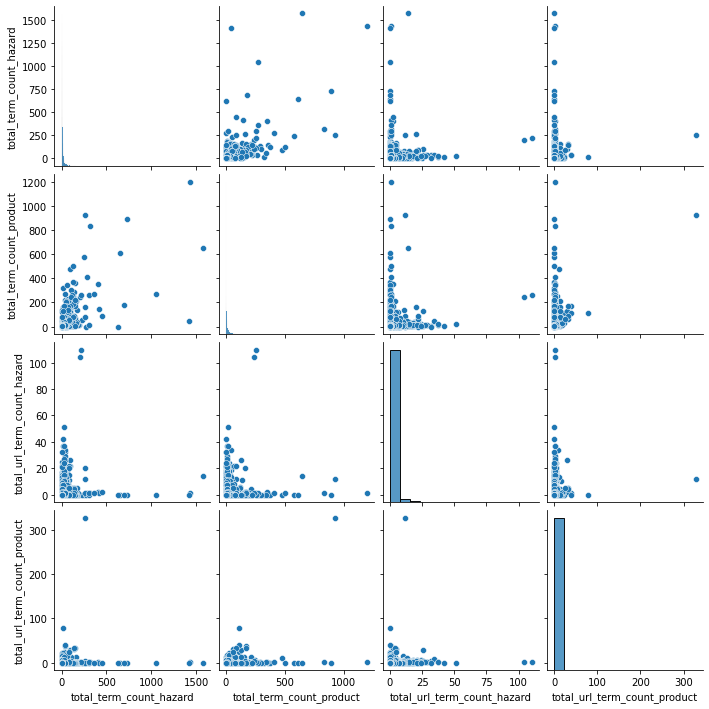

In [56]:
temp = nmdf.loc[:,'total_term_count_hazard':'total_url_term_count_product']

sns.pairplot(temp[pd.Series(temp.total_term_count_hazard) <= 2000])

In [ ]:
from datetime import datetime

In [ ]:
np.max(nmdf.post_time)

In [ ]:
int_post_time = nmdf.post_time.dropna().astype('int')/(10**9)
quantiles = (np.quantile(int_post_time, [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
[datetime.fromtimestamp(int(i)) for i in quantiles]

In [ ]:
quantiles = (np.quantile(int_post_time, [0.9,0.95,0.98]))
[datetime.fromtimestamp(int(i)) for i in quantiles]

In [ ]:
nmdf.loc[nmdf.available_comments > 0]

{'query': {'site:en-gb.facebook.com/*/posts/ OR site:www.facebook.com/*/posts/ "biphenyls" baby formula OR bottle-fed OR veggie OR vegetable OR baby food OR veg puree OR fruit puree OR fruit food OR applesauce OR cereal OR  porridge OR oats OR oatmeal OR jar food OR baby food OR  premade OR puree OR  purée OR yoghurt OR pudding'},
 'data': [{'post_id': '699851530198517',
   'text': "Looks like the Singapore government is bend on making this mandatory for the benefits of patients visiting their medical practitioners. The Ministry of Health is rolling out fast and furious to encourage and coax private doctors to digitize patient's medical data inline and up to date with their national electronic records programme among public hospitals known as NEHCR.\n\nSGIMed's advanced medical clinic software system is online ready and comprehensively covers all aspects of digitization. Read More Here : http://sgimed.com/products/e-clinic/\n#clinicsoftwaresingapore #clinicsoftware #clinicapps #softwar

## Facebook

In [10]:
fbdf = pd.DataFrame.from_dict(fb_search).transpose()
fbdf = fbdf.drop(columns=['data', 'term_counts', 'url_term_counts', 'query'])

terms = list([n for n in fb_search.values()][0]['term_counts'].keys())

for term_key in terms:
    d = {url_key: value['term_counts'][term_key] for url_key, value in fb_search.items()}
    fbdf['term_counts_' + term_key] = fbdf.index.map(d)
    
for term_key in terms:
    d = {url_key: value['url_term_counts'][term_key] for url_key, value in fb_search.items()}
    fbdf['url_term_counts_'+ term_key] = fbdf.index.map(d)
    
fbdf = fbdf.reset_index()
fbdf = fbdf.rename(columns={"index":"url"})
fbdf

,url,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,post_language,avg_comment_length,...,url_term_counts_toxic,url_term_counts_toxin,url_term_counts_veg,url_term_counts_vegetable,url_term_counts_veggie,url_term_counts_vet,url_term_counts_veterinary,url_term_counts_virus,url_term_counts_vomitoxin,url_term_counts_yoghurt
0,https://www.facebook.com/SGiMED/posts/looks-li...,0,0,0,1,4,874,2017-07-05 15:03:00,"(ENGLISH, en, 99, 992.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
1,https://www.facebook.com/115916103439458/posts...,0,1,1,2,0,243,2020-07-12 10:18:00,"(ENGLISH, en, 99, 917.0)",61,...,0,0,0,0,0,0,0,0,0,0
2,https://www.facebook.com/115169316933829/posts...,0,0,0,1,0,53,2020-10-01 08:33:00,"(ENGLISH, en, 56, 548.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
3,https://www.facebook.com/PannKaungShweSinFoodA...,2,0,0,1,0,NaN,2020-11-28 16:53:00,"(Unknown, un, 0, 0.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
4,https://www.facebook.com/HZGlobalFruits/posts/...,260,37,37,36,116,4416,2019-11-11 06:15:00,"(ENGLISH, en, 94, 836.0)",18.4324,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777,https://facebook.com/story.php?story_fbid=1594...,5,0,0,1,4,598,2020-12-15 04:00:00,"(ENGLISH, en, 99, 929.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
6778,https://facebook.com/story.php?story_fbid=1593...,5,0,0,1,4,619,2020-12-14 04:10:00,"(ENGLISH, en, 99, 969.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
6779,https://facebook.com/story.php?story_fbid=1593...,12,1,1,2,4,588,2020-12-13 18:53:00,"(ENGLISH, en, 99, 855.0)",4,...,0,0,0,0,0,0,0,0,0,0
6780,https://facebook.com/story.php?story_fbid=1559...,69,5,6,6,2,753,2020-11-03 11:48:00,"(ENGLISH, en, 99, 1076.0)",26.2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fbdf.post_language.str

check the lowest scoring english categories to see if they are indeed english.

According to this source, I believe the last number is a score. https://github.com/aboSamoor/pycld2/blob/e3ac86ed4d4902e912691c1531d0c5645382a726/bindings/pycldmodule.cc

PyObject *details = PyTuple_New(3);
  for (Py_ssize_t idx = 0; idx < 3; idx++) {
    CLD2::Language lang = language3[idx];
    // Steals ref
    PyTuple_SET_ITEM(details,
                     idx,
                     Py_BuildValue("(ssif)",
                                   CLD2::LanguageName(lang),
                                   CLD2::LanguageCode(lang),
                                   percent3[idx],
                                   normalized_score3[idx]))

In [13]:
english_fb_view = fbdf.loc[fbdf.post_language.str[0].str.contains('ENGLISH') == 1]

#we sort by the size of the range detected as english. the last two numbers are the range of bits which 
#were detected as english.
fb_sorted_english = english_fb_view.loc[english_fb_view.post_language.str[3].sort_values().index]
fb_sorted_english


,url,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,post_language,avg_comment_length,...,url_term_counts_toxic,url_term_counts_toxin,url_term_counts_veg,url_term_counts_vegetable,url_term_counts_veggie,url_term_counts_vet,url_term_counts_veterinary,url_term_counts_virus,url_term_counts_vomitoxin,url_term_counts_yoghurt
1744,https://facebook.com/story.php?story_fbid=1776...,1,0,0,1,2,241,2018-01-28 14:58:00,"(ENGLISH, en, 98, 109.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
5918,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:12:00,"(ENGLISH, en, 98, 126.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
5917,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:12:00,"(ENGLISH, en, 98, 126.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
5916,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:13:00,"(ENGLISH, en, 98, 126.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
6299,https://facebook.com/story.php?story_fbid=1535...,5,1,1,2,0,NaN,2015-01-01 06:38:00,"(ENGLISH, en, 83, 204.0)",4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,https://facebook.com/story.php?story_fbid=7049...,12,0,0,1,2,71,2020-09-17 13:37:00,"(ENGLISH, en, 95, 2092.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
2289,https://facebook.com/story.php?story_fbid=1612...,1,0,0,1,0,23,2021-03-16 09:00:00,"(ENGLISH, en, 95, 2096.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
2270,https://facebook.com/story.php?story_fbid=1642...,1,0,0,1,0,13,2021-04-26 19:17:00,"(ENGLISH, en, 90, 2252.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
3535,https://facebook.com/story.php?story_fbid=1581...,3,1,1,2,0,NaN,2017-11-06 19:56:00,"(ENGLISH, en, 80, 2304.0)",3,...,0,0,0,0,0,0,0,0,0,0


In [102]:
list(fb_sorted_english['url'])


['https://facebook.com/story.php?story_fbid=1776118095796850&id=448911908517482',
 'https://facebook.com/story.php?story_fbid=221451889249900&id=113734933354930',
 'https://facebook.com/story.php?story_fbid=221452175916538&id=113734933354930',
 'https://facebook.com/story.php?story_fbid=221452492583173&id=113734933354930',
 'https://facebook.com/story.php?story_fbid=1535960576659544&id=1499107747011494',
 'https://facebook.com/story.php?story_fbid=405137666697594&id=165864977291532',
 'https://facebook.com/story.php?story_fbid=3357957000955017&id=1306689119415159',
 'https://facebook.com/story.php?story_fbid=959082314618810&id=382697485590632',
 'https://facebook.com/story.php?story_fbid=912998099509567&id=343148613161188',
 'https://facebook.com/story.php?story_fbid=167467397981683&id=113734933354930',
 'https://facebook.com/story.php?story_fbid=836218933453992&id=504812539927968',
 'https://facebook.com/story.php?story_fbid=3501493613253159&id=885015304901016',
 'https://facebook.com

it seems to work pretty well! It's all english!. so roughtly 90% of results are english


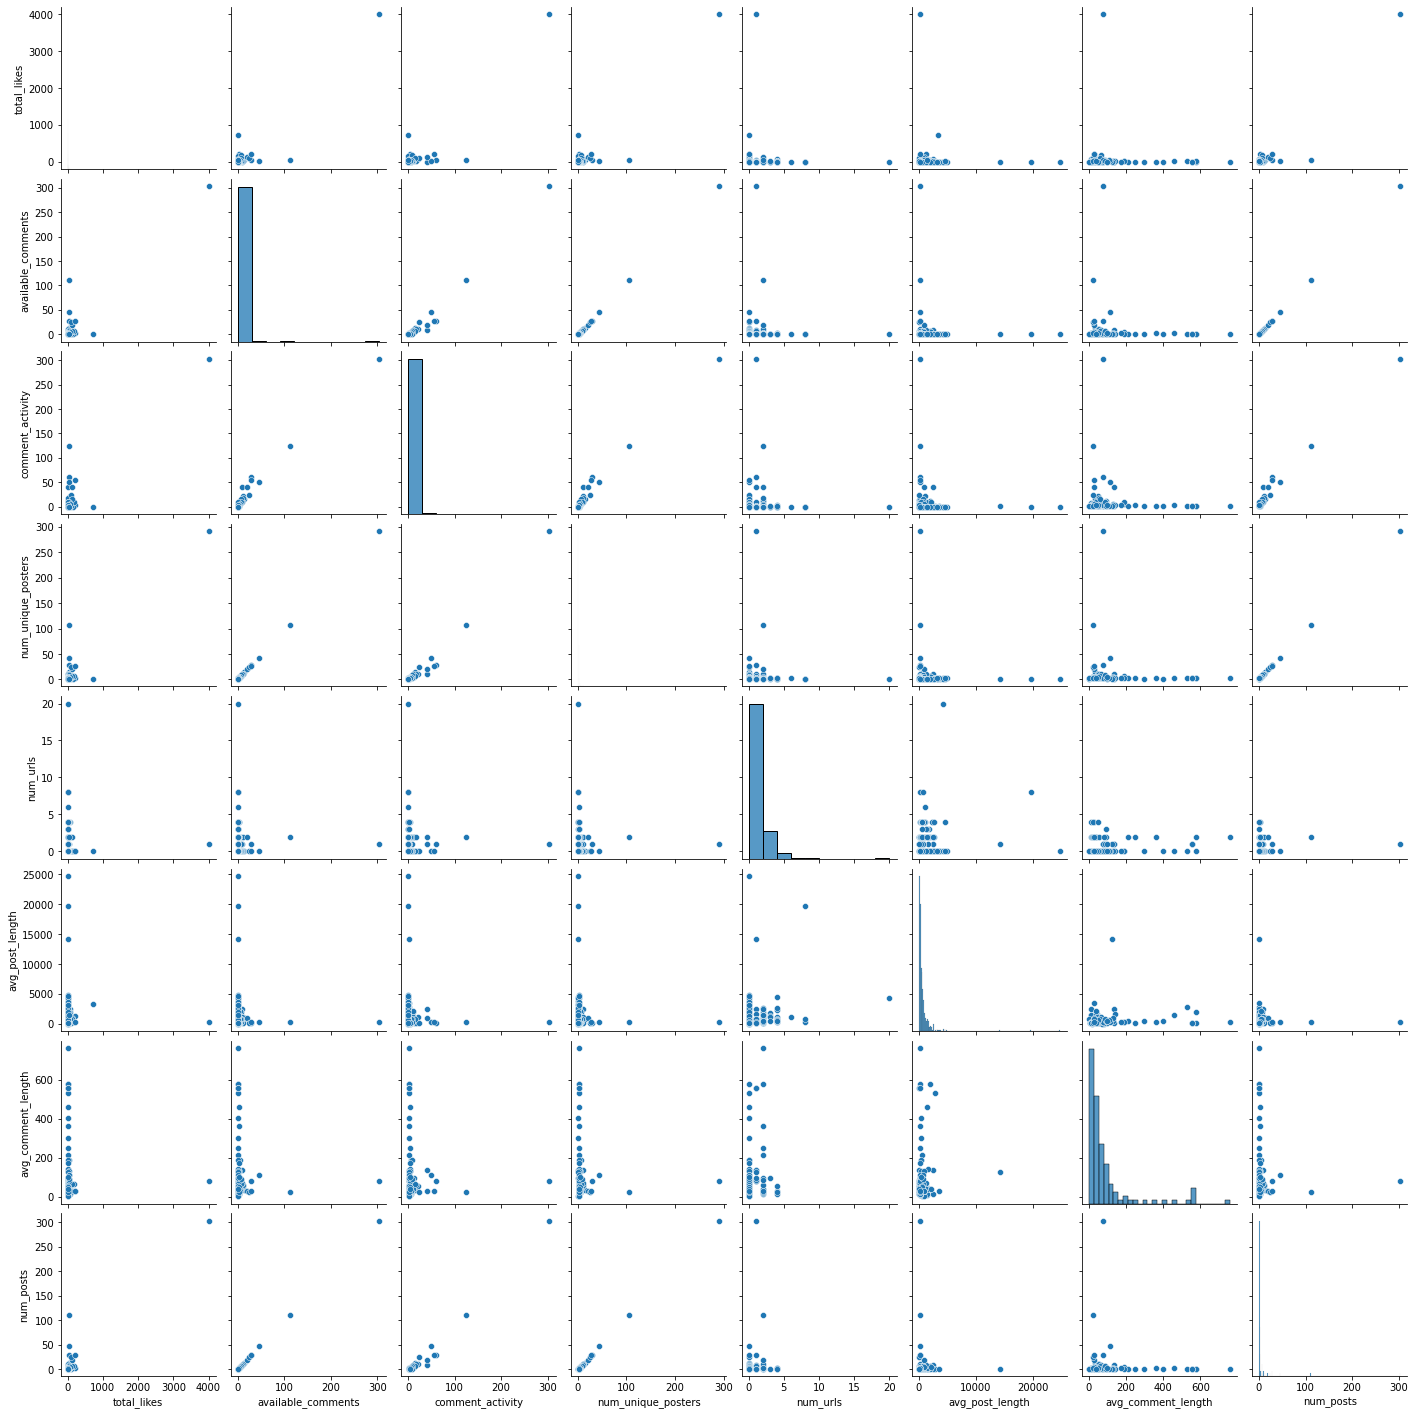

In [107]:
fb_sample = english_fb_view[english_fb_view.columns[pd.Series(english_fb_view.columns).str.contains('term_counts_') == 0]].drop(['url'],axis=1).sample(500)
sns.pairplot(fb_sample)

In [105]:
fbdf

,url,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,post_language,avg_comment_length,...,url_term_counts_toxic,url_term_counts_toxin,url_term_counts_veg,url_term_counts_vegetable,url_term_counts_veggie,url_term_counts_vet,url_term_counts_veterinary,url_term_counts_virus,url_term_counts_vomitoxin,url_term_counts_yoghurt
0,https://www.facebook.com/SGiMED/posts/looks-li...,0,0,0,1,4,874,2017-07-05 15:03:00,"(ENGLISH, en, 99, 992.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
1,https://www.facebook.com/115916103439458/posts...,0,1,1,2,0,243,2020-07-12 10:18:00,"(ENGLISH, en, 99, 917.0)",61,...,0,0,0,0,0,0,0,0,0,0
2,https://www.facebook.com/115169316933829/posts...,0,0,0,1,0,53,2020-10-01 08:33:00,"(ENGLISH, en, 56, 548.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
3,https://www.facebook.com/PannKaungShweSinFoodA...,2,0,0,1,0,NaN,2020-11-28 16:53:00,"(Unknown, un, 0, 0.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
4,https://www.facebook.com/HZGlobalFruits/posts/...,260,37,37,36,116,4416,2019-11-11 06:15:00,"(ENGLISH, en, 94, 836.0)",18.4324,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777,https://facebook.com/story.php?story_fbid=1594...,5,0,0,1,4,598,2020-12-15 04:00:00,"(ENGLISH, en, 99, 929.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
6778,https://facebook.com/story.php?story_fbid=1593...,5,0,0,1,4,619,2020-12-14 04:10:00,"(ENGLISH, en, 99, 969.0)",NaN,...,0,0,0,0,0,0,0,0,0,0
6779,https://facebook.com/story.php?story_fbid=1593...,12,1,1,2,4,588,2020-12-13 18:53:00,"(ENGLISH, en, 99, 855.0)",4,...,0,0,0,0,0,0,0,0,0,0
6780,https://facebook.com/story.php?story_fbid=1559...,69,5,6,6,2,753,2020-11-03 11:48:00,"(ENGLISH, en, 99, 1076.0)",26.2,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# add the term counts.

#add totals
term_count_df = fbdf[fbdf.columns[pd.Series(fbdf.columns).str.startswith('term_counts_')]]
term_count_hazard_df = term_count_df[hazards]
term_count_product_df = term_count_df[products]
url_term_count_hazard_df = url_term_count_df[hazards]
url_term_count_product_df = url_term_count_df[products]
url_term_count_df = fbdf[fbdf.columns[pd.Series(fbdf.columns).str.startswith('url_term_counts_')]]

fbdf['total_term_count'] = term_count_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
fbdf['total_url_term_count'] = term_count_df.sum(axis=1)

fbdf['total_term_count_hazard'] = term_count_hazard_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
fbdf['total_url_term_count_hazard'] = url_term_count_hazard_df.sum(axis=1)

fbdf['total_term_count_product'] = term_count_product_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
fbdf['total_url_term_count_product'] = url_term_count_product_df.sum(axis=1)

NameError: name 'hazards' is not defined